https://nipy.org/nibabel/coordinate_systems.html  
https://stackoverflow.com/questions/59971982/save-3d-numpy-array-with-high-speed-into-the-disk 
https://nilearn.github.io/modules/generated/nilearn.image.resample_img.html  
http://adni.loni.usc.edu/methods/mri-tool/mri-pre-processing/  
https://docs.safe.com/fme/html/FME_Desktop_Documentation/FME_ReadersWriters/nifti/nifti.htm  
https://www.brainvoyager.com/bv/doc/UsersGuide/CoordsAndTransforms/SpatialTransformationMatrices.html

### Import libraries

In [4]:
import nibabel as nib    
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=5, suppress=True)
from auxiliary_functions import *

### Load images

In [15]:
first_img = nib.load("first_img.nii")
second_img = nib.load("second_img.nii")
print("Shape of the first image:",first_img.get_fdata().shape)
print("Shape of the second image:",second_img.get_fdata().shape)

Shape of the first image: (256, 256, 166)
Shape of the second image: (256, 256, 170)


In [43]:
print("COMPARING AFFINE ARRAYS")
print("=" * 70)
print(first_img.affine)
print("*" * 70)
print(second_img.affine)

COMPARING AFFINE ARRAYS
[[  0.        0.00027  -1.19626  95.1955 ]
 [ -0.00027  -1.01953  -0.00031 163.73599]
 [ -1.01993   0.00027   0.      128.224  ]
 [  0.        0.        0.        1.     ]]
**********************************************************************
[[  0.        0.00026  -1.20439 104.43925]
 [ -0.00026  -0.99775  -0.00032 135.16013]
 [ -1.00659   0.00026   0.      143.5303 ]
 [  0.        0.        0.        1.     ]]


### Visualize images

Both images have a different field of view, shape, size, and orientation in the magnet.

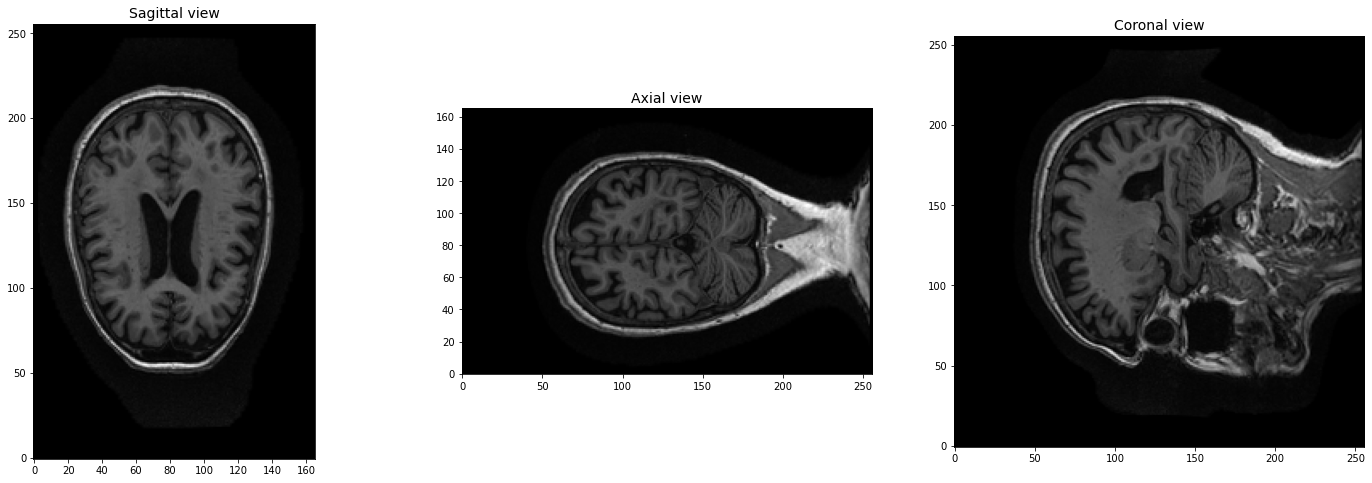

In [22]:
neuro_plot(first_img, view_ = "all", slice_ = [100,180,60])

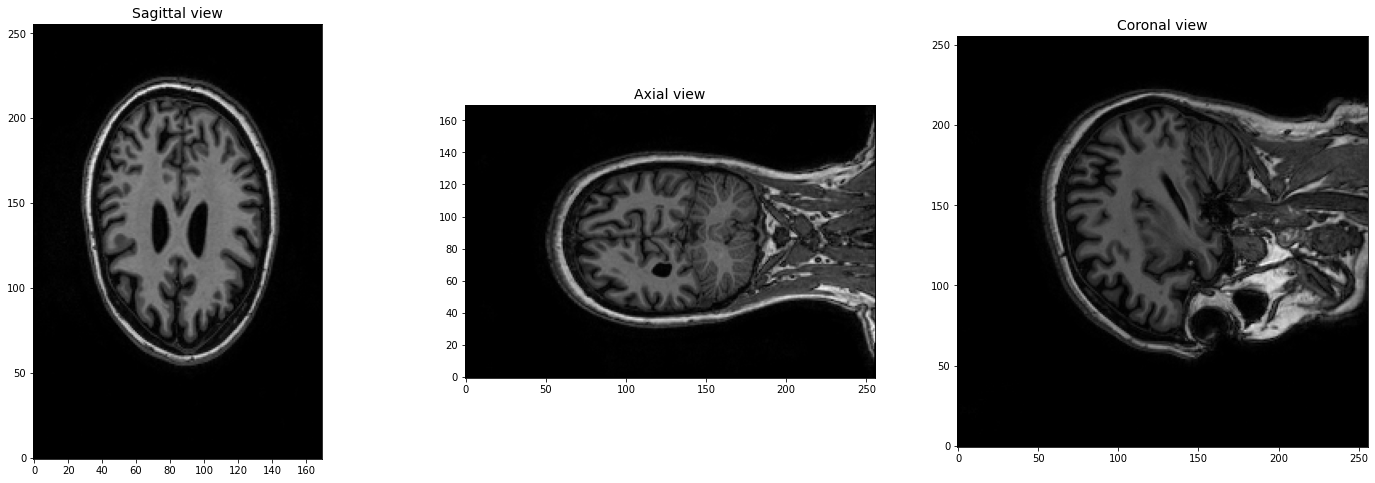

In [23]:
neuro_plot(second_img, view_ = "all", slice_ = [100,180,60])

### Voxels

A voxel is a pixel with volume.  

The plot of the nii slices displays the slices in grayscale (graded between black for the minimum value, white for the maximum). Each pixel in the slice grayscale image also represents a voxel, because this 2D image represents a slice from the 3D image with a certain thickness.

The 3D array is therefore also a voxel array. As for any array, we can select particular values by indexing. For example, we can get the value for the middle voxel in the nii data array like this:

In [37]:
# FIRST IMAGE
print("FIRST IMAGE")
n_i, n_j, n_k = first_img.get_fdata().shape
center_i = (n_i - 1) // 2  # // for integer division
center_j = (n_j - 1) // 2
center_k = (n_k - 1) // 2
print("Center_voxel =", (center_i, center_j, center_k))

center_vox_value = first_img.get_fdata()[center_i, center_j, center_k]
print("Center_voxel_value =", center_vox_value)

# SECOND IMAGE
print("*" * 40)
print("SECOND IMAGE")
n_i, n_j, n_k = second_img.get_fdata().shape
center_i = (n_i - 1) // 2  # // for integer division
center_j = (n_j - 1) // 2
center_k = (n_k - 1) // 2
print("Center_voxel =", (center_i, center_j, center_k))

center_vox_value = second_img.get_fdata()[center_i, center_j, center_k]
print("Center_voxel_value =", center_vox_value)

FIRST IMAGE
Center = (127, 127, 82)
Center_vox_value = 99.4511489868164
****************************************
SECOND IMAGE
Center = (127, 127, 84)
Center_vox_value = 33.26734924316406


We have 2 magnetic resonances images, and the goal is to relate the data from both images. 
However, it is not possible now, as we collected the first image with a different field of view and orientation to the second image, so the voxel coordinates in the second image refer to different locations in the magnet to the voxel coordinates in the first image.

We have an anatomical and an EPI scan, and later on we will surely want to be able to relate the data from someones_epi.nii.gz to someones_anatomy.nii.gz. We can’t easily do this at the moment, because we collected the anatomical image with a different field of view and orientation to the EPI image, so the voxel coordinates in the EPI image refer to different locations in the magnet to the voxel coordinates in the anatomical image.

We solve this problem by keeping track of the relationship of voxel coordinates to some reference space. In particular, the affine array stores the relationship between voxel coordinates in the image data array and coordinates in the reference space. We store the relationship of voxel coordinates from someones_epi.nii.gz and the reference space, and also the (different) relationship of voxel coordinates in someones_anatomy.nii.gz to the same reference space. Because we know the relationship of (voxel coordinates to the reference space) for both images, we can use this information to relate voxel coordinates in someones_epi.nii.gz to spatially equivalent voxel coordinates in someones_anatomy.nii.gz.

In [51]:
M = first_img.affine[:3, :3]
print(M)
abc =first_img.affine[:3, 3]
print("*" * 40)
print(abc)

[[ 0.       0.00027 -1.19626]
 [-0.00027 -1.01953 -0.00031]
 [-1.01993  0.00027  0.     ]]
****************************************
[ 95.1955  163.73599 128.224  ]


In [52]:
def f(i, j, k):
    """ Return X, Y, Z coordinates for i, j, k """
    return M.dot([i, j, k]) + abc

In [53]:
first_img_vox_center = (np.array(first_img.get_fdata().shape) - 1) / 2.
f(first_img_vox_center[0], first_img_vox_center[1], first_img_vox_center[2])

array([-3.46174, 33.6858 , -1.78335])

In [48]:
print("COMPARING AFFINE ARRAYS")
print("=" * 70)
print(first_img.affine)
print("*" * 70)
print(second_img.affine)

COMPARING AFFINE ARRAYS
[[  0.        0.00027  -1.19626  95.1955 ]
 [ -0.00027  -1.01953  -0.00031 163.73599]
 [ -1.01993   0.00027   0.      128.224  ]
 [  0.        0.        0.        1.     ]]
**********************************************************************
[[  0.        0.00026  -1.20439 104.43925]
 [ -0.00026  -0.99775  -0.00032 135.16013]
 [ -1.00659   0.00026   0.      143.5303 ]
 [  0.        0.        0.        1.     ]]


### 1.5 T scans vs 3T scans
**MRI scanners are created with varying magnetic field strength, measured in a unit called teslas (T). Today, the most common magnet strengths in MRI machines used in clinical settings are 1.5T and 3.0T. As the numbers imply, a 3.0T magnet is twice as strong as a 1.5T magnet.**

https://www.gehealthcare.com/feature-article/15t-compared-to-30t-mri-scanners

In [5]:
low_teslas_img = nib.load("datasets/test_1.5t.nii")
high_teslas_img = nib.load("datasets/test_3t.nii")
print("Shape of the 1.5T image:", low_teslas_img.get_fdata().shape)
print("Shape of the 3T image:", high_teslas_img.get_fdata().shape)

Shape of the first image: (256, 256, 166)
Shape of the second image: (240, 256, 160)


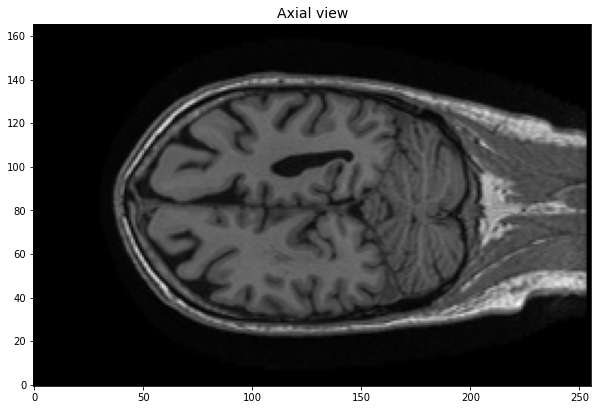

In [7]:
neuro_plot(low_teslas_img, view_ = "axial")

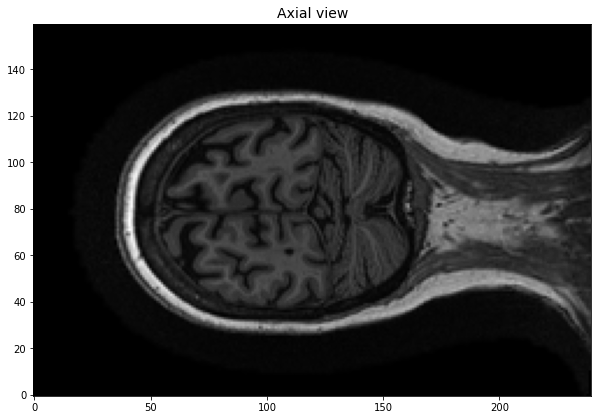

In [6]:
neuro_plot(high_teslas_img, view_ = "axial")